In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from pandas.io.json import json_normalize

import CleanDataFun as clean
import Merge_Country_Data as merge

In [25]:
df = clean.cleanData('../Data/Youtube/USvideos.csv', '../Data/Youtube/US_category_id.json', "latin_1")

In [26]:
df = df.drop_duplicates()

In [33]:
df = df.sort_values(by='dislikes', ascending = False)
df.head(3)

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category
5912,QwZT7T-TXT0,2018-01-09,So Sorry.,Logan Paul Vlogs,2018-01-02,"logan paul vlog,logan paul,logan,paul,olympics...",37539570,1402578,1674420,1361580,https://i.ytimg.com/vi/QwZT7T-TXT0/default.jpg,False,False,False,NaN,Entertainment
4703,FlsCjmMhFmw,2017-12-14,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,2017-12-06,"rewind,rewind 2017,youtube rewind 2017,#youtub...",149376127,3093544,1643059,810698,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Entertainment
5860,QwZT7T-TXT0,2018-01-08,So Sorry.,Logan Paul Vlogs,2018-01-02,"logan paul vlog,logan paul,logan,paul,olympics...",35983135,1370845,1611043,1321281,https://i.ytimg.com/vi/QwZT7T-TXT0/default.jpg,False,False,False,NaN,Entertainment


In [28]:
p = pd.pivot_table(df, values=['dislikes','likes'], index=['title','channel_title']) 
p = p.sort_values(by='dislikes', ascending = False)

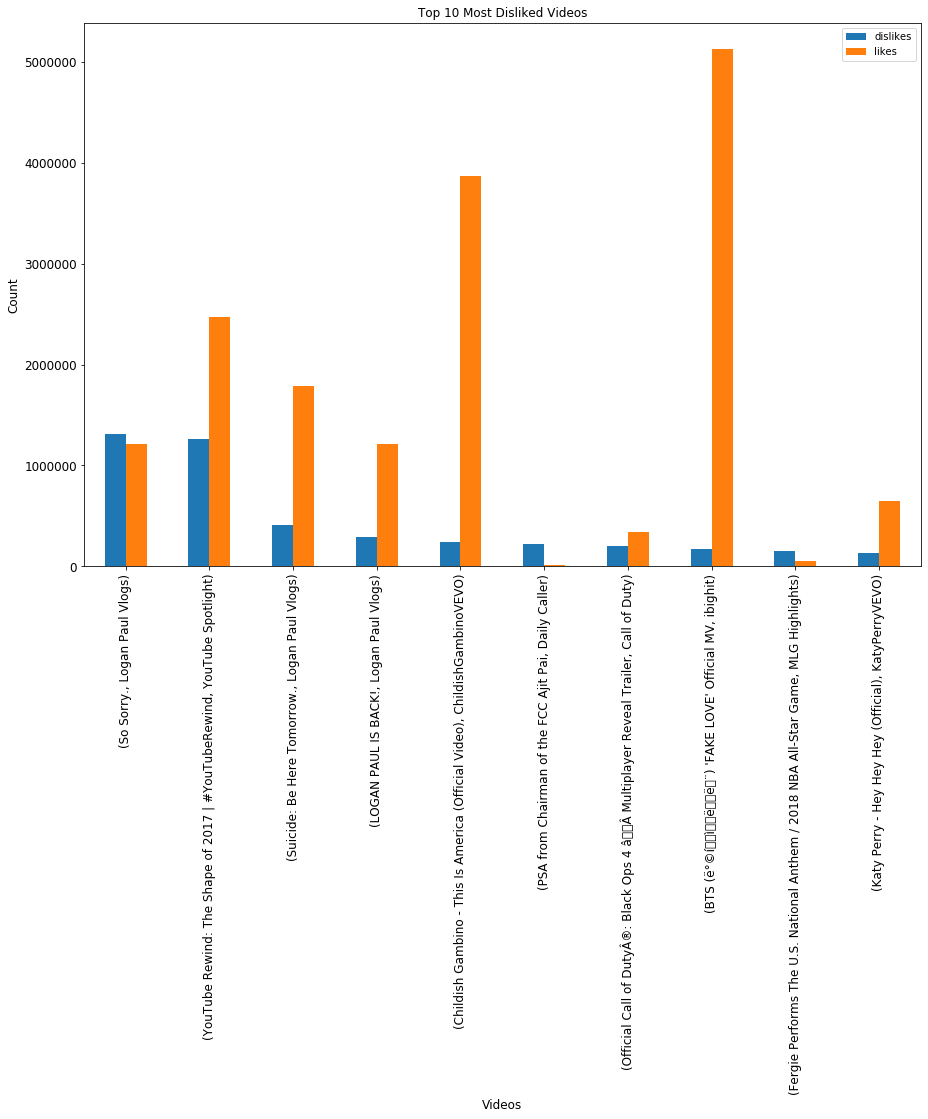

In [29]:
ax = p[['dislikes','likes']][:10].plot(kind='bar', title ="Top 10 Most Disliked Videos", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Videos", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

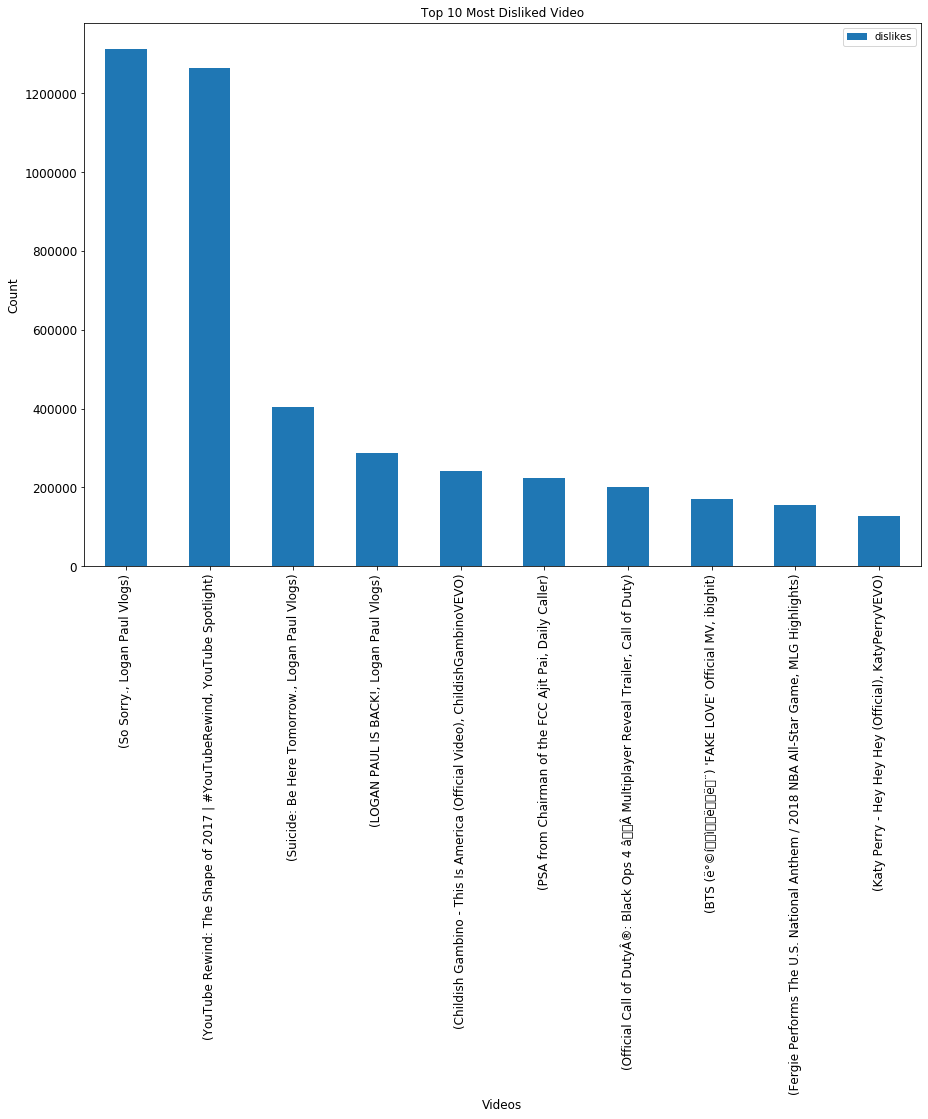

In [30]:
ax = p[['dislikes']][:10].plot(kind='bar', title ="Top 10 Most Disliked Video", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Videos", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

In [31]:
p.head()

,,dislikes,likes
title,channel_title,,
So Sorry.,Logan Paul Vlogs,1.313220e+06,1.213676e+06
YouTube Rewind: The Shape of 2017 | #YouTubeRewind,YouTube Spotlight,1.263894e+06,2.472672e+06
Suicide: Be Here Tomorrow.,Logan Paul Vlogs,4.049249e+05,1.783878e+06
LOGAN PAUL IS BACK!,Logan Paul Vlogs,2.862875e+05,1.211898e+06
Childish Gambino - This Is America (Official Video),ChildishGambinoVEVO,2.421774e+05,3.868033e+06


In [19]:
p[:10]

,,dislikes,likes,dislike_ratio
title,channel_title,,,
PSA from Chairman of the FCC Ajit Pai,Daily Caller,223806.333333,9346.666667,0.959912
The FCC repeals its net neutrality rules,Washington Post,125157.750000,5597.750000,0.957189
Judge Roy Moore Campaign Statement,Roy Moore for Senate,49744.875000,3627.875000,0.932028
Grammys 2018: Hillary Clinton surprises crowd to read Fire and Fury,CBS News,16493.666667,3432.333333,0.827746
Terry Crews Says He Was Sexually Assaulted,Wendy Williams,14575.000000,3110.000000,0.824145
House Speaker Paul Ryan: âDonât Forget This Is A Big Tax Cut For Families As Wellâ | TODAY,TODAY,7373.636364,1790.000000,0.804663
Chloe Grace Moretz on Louis C.K. and the #MeToo movement,Variety,3870.714286,1055.714286,0.785704
I Feel Pretty Trailer #1 | Movieclips Trailers,Movieclips Trailers,31384.700000,8826.300000,0.780500
Why black Americans are getting less sleep,Vox,32694.200000,9675.700000,0.771637


In [14]:
p = p[p['dislikes'] > 1000]  
p = p[p['likes'] > 1000]
p['dislike_ratio'] = p['dislikes']/(p['dislikes']+p['likes'])

In [15]:
p = p.sort_values(by='dislike_ratio', ascending = False)

C:\Users\Sylvia\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Sylvia\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Sylvia\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 152 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\Sylvia\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0, flags=flags)


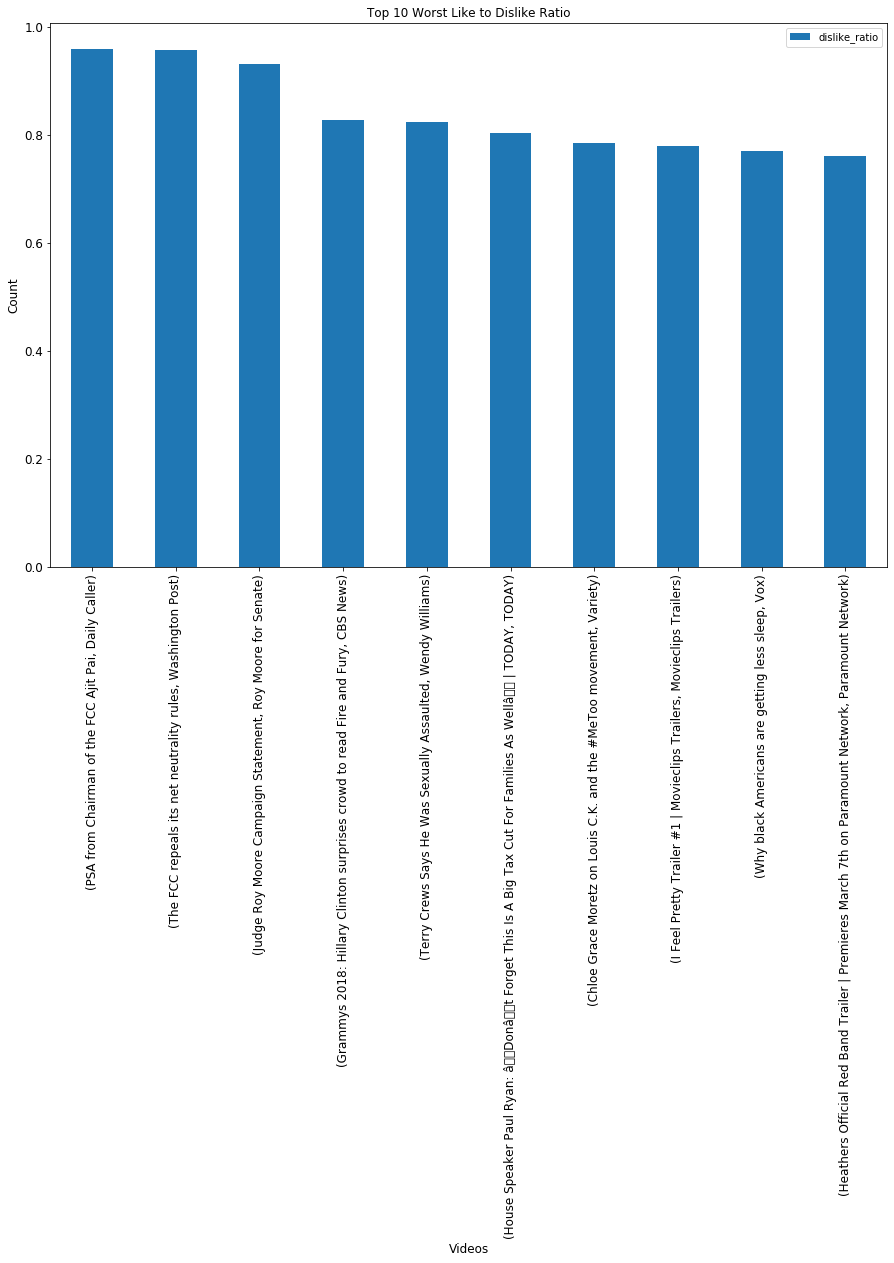

In [16]:
ax = p[['dislike_ratio']][:10].plot(kind='bar', title ="Top 10 Worst Like to Dislike Ratio", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Videos", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

In [23]:
p = p[p['dislikes'] > 1000]  
p = p[p['likes'] > 1000]
p['like_ratio'] = p['likes']/(p['dislikes']+p['likes'])
p = p.sort_values(by='like_ratio', ascending = False)

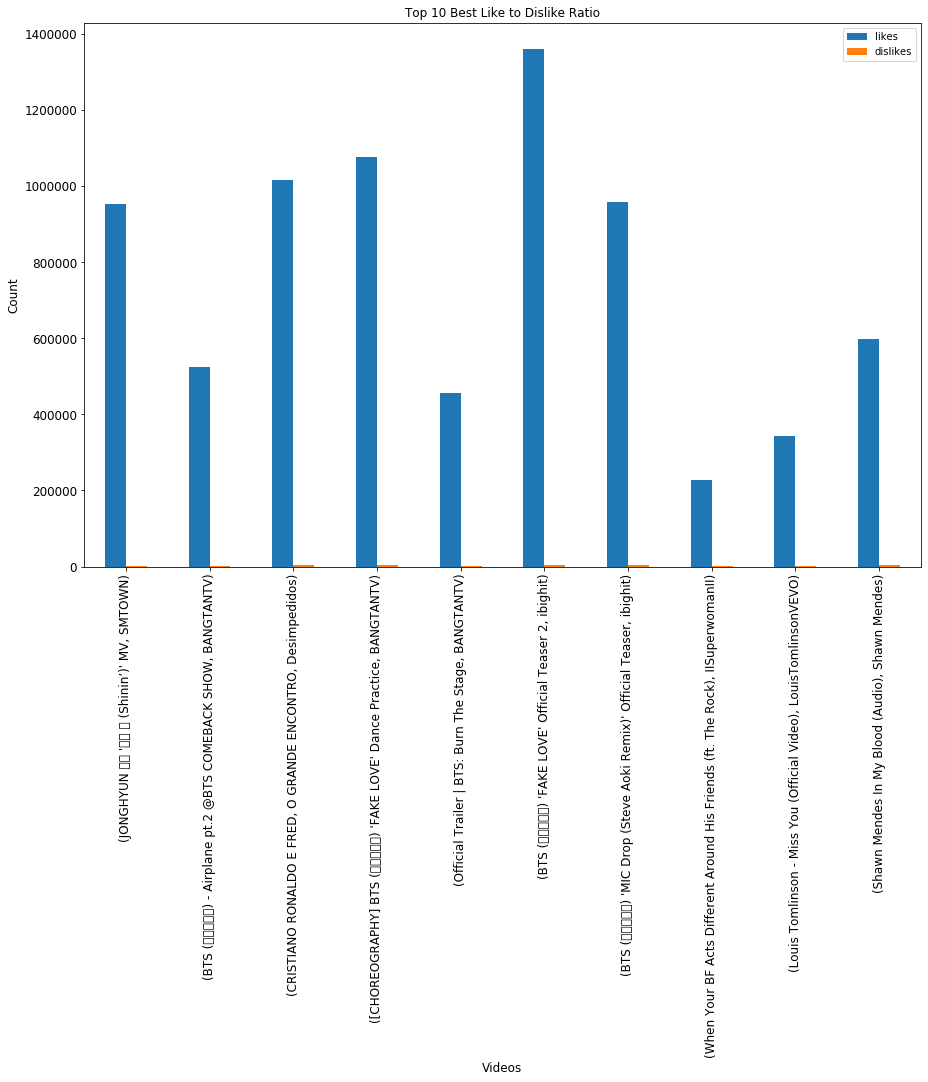

In [27]:
ax = p[['likes', 'dislikes']][:10].plot(kind='bar', title ="Top 10 Best Like to Dislike Ratio", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Videos", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

In [28]:
p

,,dislikes,likes,dislike_ratio,like_ratio
title,channel_title,,,,
JONGHYUN 종현 '빛이 나 (Shinin’)' MV,SMTOWN,2428.166667,9.537250e+05,0.002540,0.997460
BTS (방탄소년단) - Airplane pt.2 @BTS COMEBACK SHOW,BANGTANTV,1666.000000,5.251963e+05,0.003162,0.996838
"CRISTIANO RONALDO E FRED, O GRANDE ENCONTRO",Desimpedidos,3596.333333,1.017472e+06,0.003522,0.996478
[CHOREOGRAPHY] BTS (방탄소년단) 'FAKE LOVE' Dance Practice,BANGTANTV,4007.777778,1.076063e+06,0.003711,0.996289
Official Trailer | BTS: Burn The Stage,BANGTANTV,1758.461538,4.565430e+05,0.003837,0.996163
...,...,...,...,...,...
Terry Crews Says He Was Sexually Assaulted,Wendy Williams,14575.000000,3.110000e+03,0.824145,0.175855
Grammys 2018: Hillary Clinton surprises crowd to read Fire and Fury,CBS News,16493.666667,3.432333e+03,0.827746,0.172254
Judge Roy Moore Campaign Statement,Roy Moore for Senate,49744.875000,3.627875e+03,0.932028,0.067972


In [13]:
df = merge.allParcableCountryData()

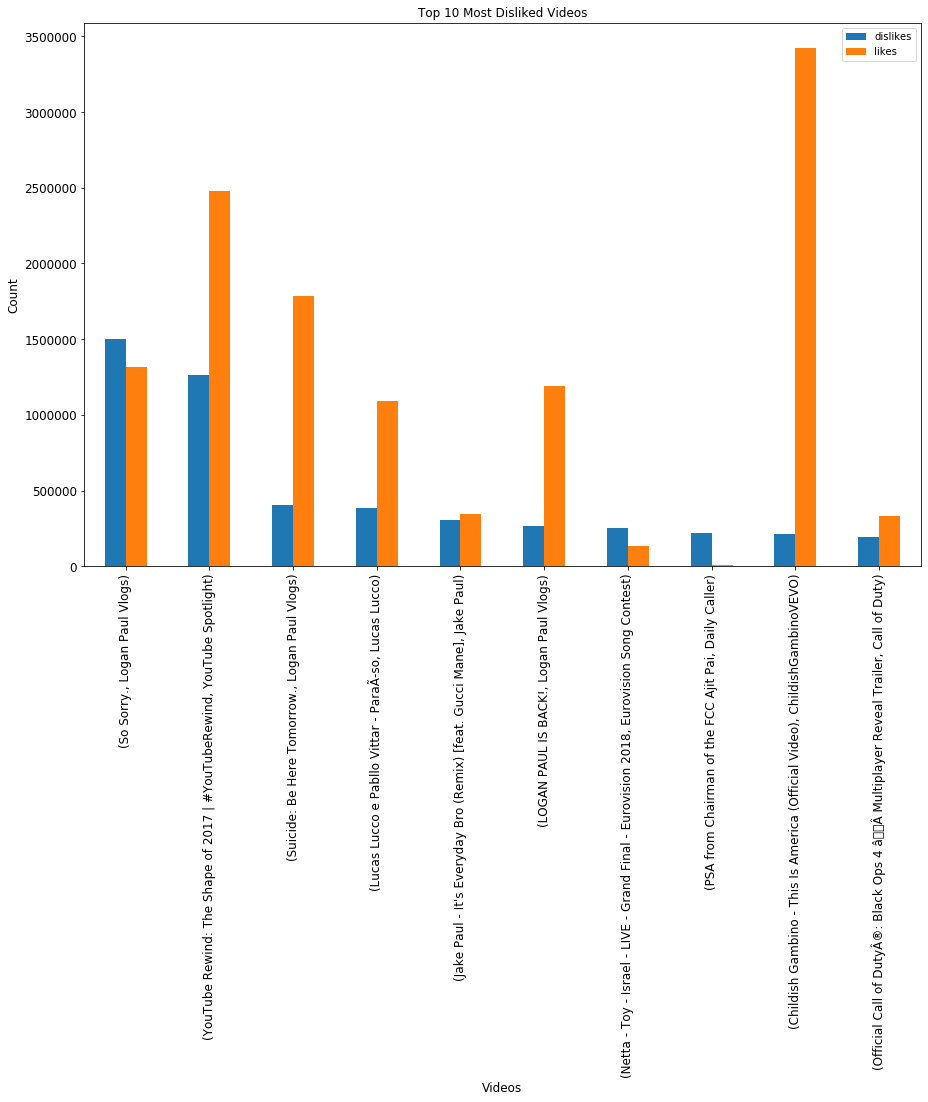

In [14]:
df = df.sort_values(by='dislikes', ascending = False)
p = pd.pivot_table(df, values=['dislikes','likes'], index=['title','channel_title']) 
p = p.sort_values(by='dislikes', ascending = False)
ax = p[['dislikes','likes']][:10].plot(kind='bar', title ="Top 10 Most Disliked Videos", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Videos", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

C:\Users\Sylvia\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Sylvia\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 138 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Sylvia\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 136 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Sylvia\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Sylvia\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Sylvia\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 129 missing from current

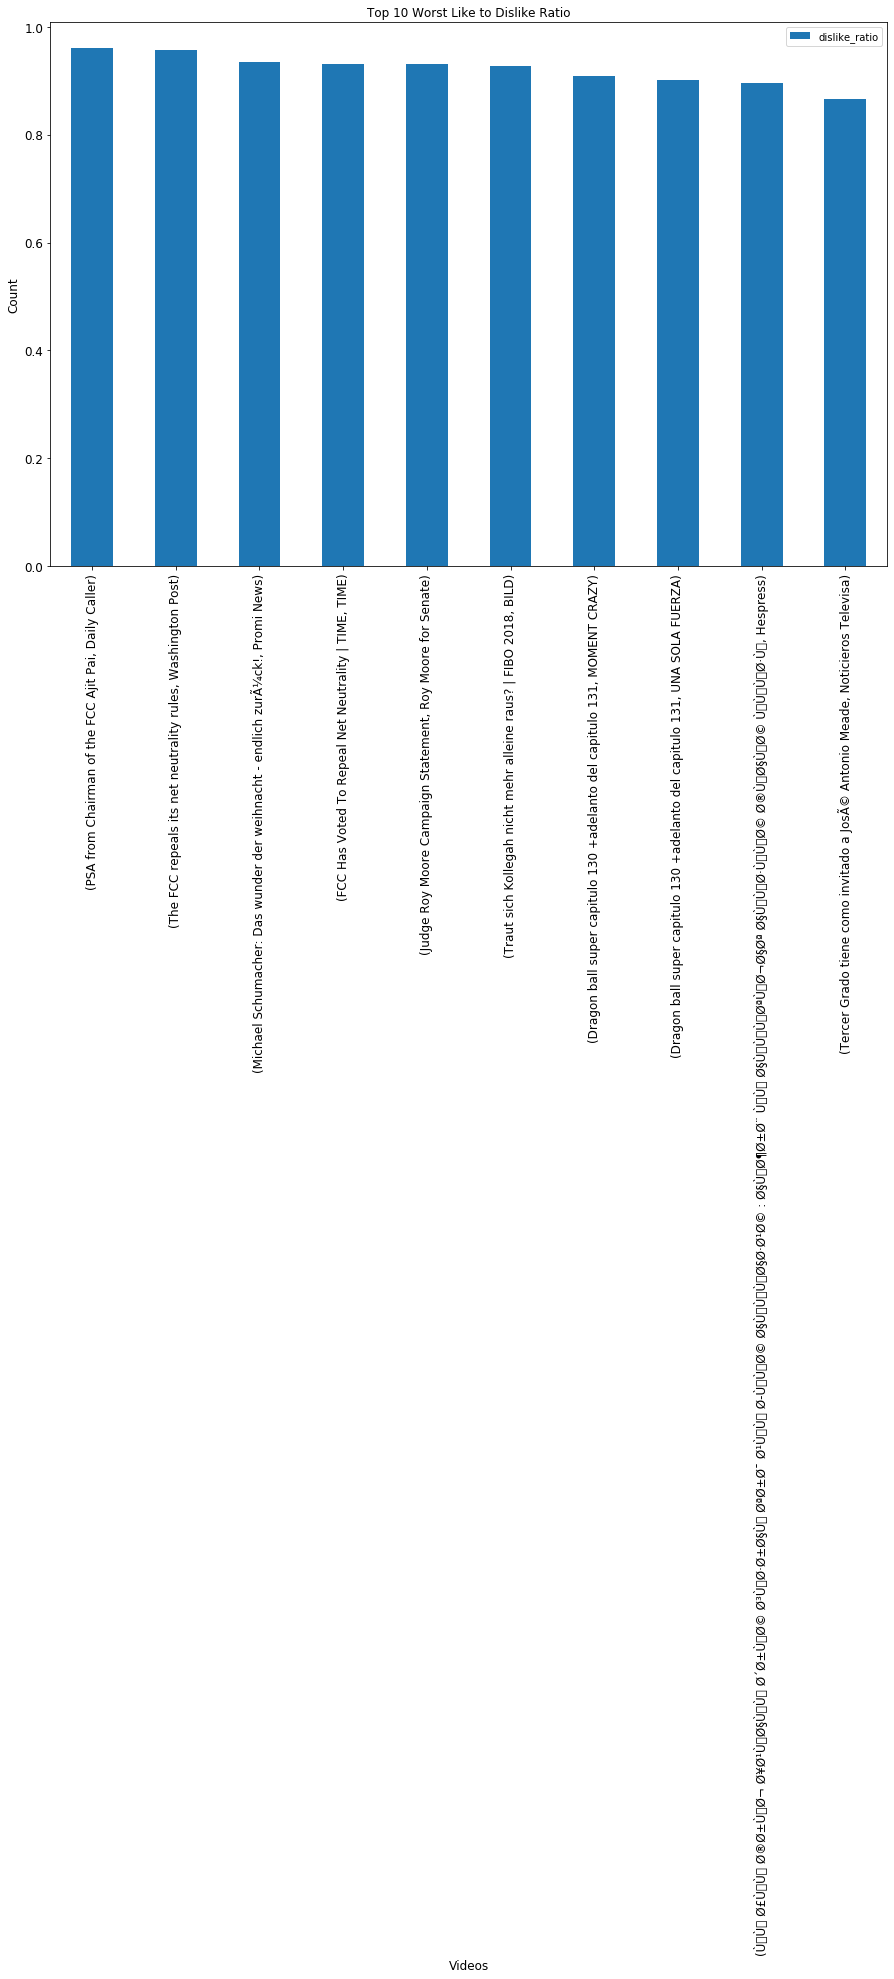

In [15]:
p = p[p['dislikes'] > 1000]  
p = p[p['likes'] > 1000]
p['dislike_ratio'] = p['dislikes']/(p['dislikes']+p['likes'])
p = p.sort_values(by='dislike_ratio', ascending = False)
ax = p[['dislike_ratio']][:10].plot(kind='bar', title ="Top 10 Worst Like to Dislike Ratio", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Videos", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

In [21]:
p[:10]

,,dislikes,likes,dislike_ratio
title,channel_title,,,
PSA from Chairman of the FCC Ajit Pai,Daily Caller,223806.333333,9346.666667,0.959912
The FCC repeals its net neutrality rules,Washington Post,125157.750000,5597.750000,0.957189
Judge Roy Moore Campaign Statement,Roy Moore for Senate,49744.875000,3627.875000,0.932028
Grammys 2018: Hillary Clinton surprises crowd to read Fire and Fury,CBS News,16493.666667,3432.333333,0.827746
Terry Crews Says He Was Sexually Assaulted,Wendy Williams,14575.000000,3110.000000,0.824145
House Speaker Paul Ryan: âDonât Forget This Is A Big Tax Cut For Families As Wellâ | TODAY,TODAY,7373.636364,1790.000000,0.804663
Chloe Grace Moretz on Louis C.K. and the #MeToo movement,Variety,3870.714286,1055.714286,0.785704
I Feel Pretty Trailer #1 | Movieclips Trailers,Movieclips Trailers,31384.700000,8826.300000,0.780500
Why black Americans are getting less sleep,Vox,32694.200000,9675.700000,0.771637


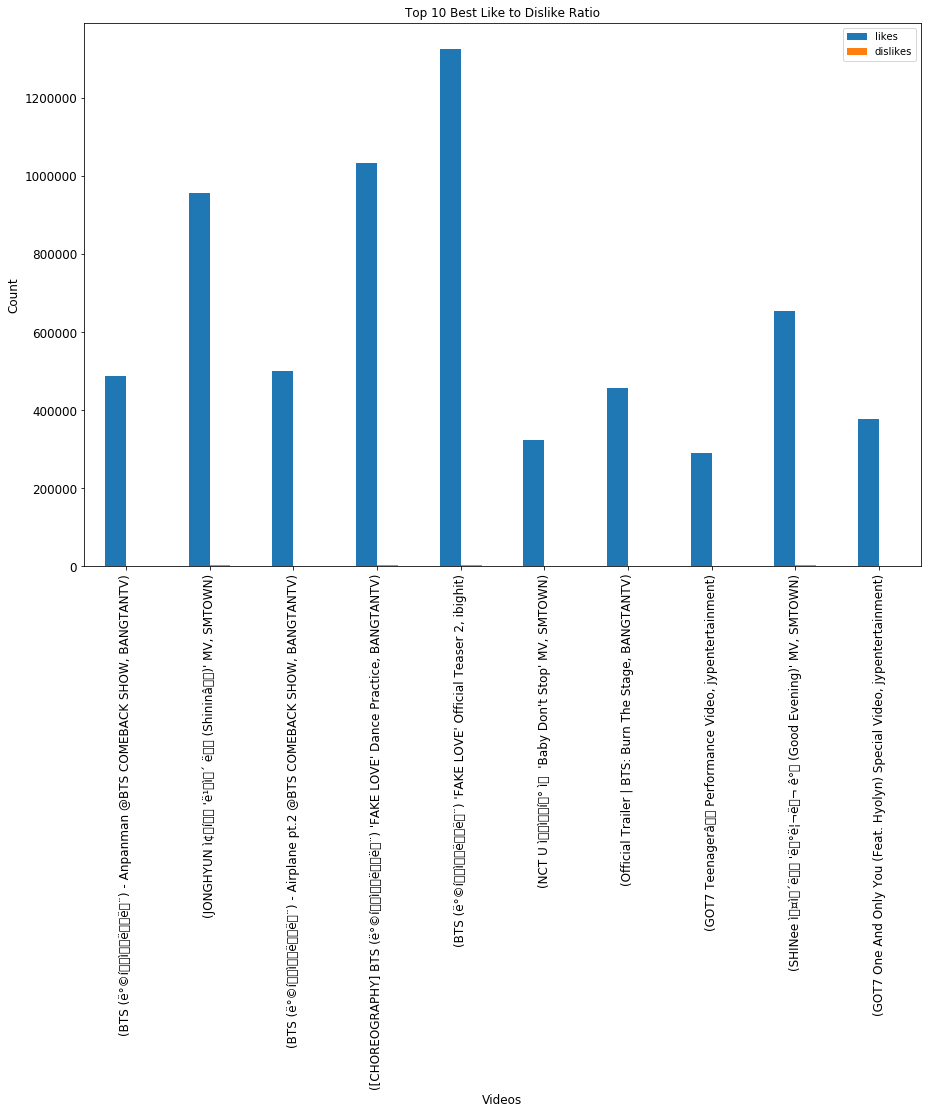

In [18]:
p = p[p['dislikes'] > 1000]  
p = p[p['likes'] > 1000]
p['like_ratio'] = p['likes']/(p['dislikes']+p['likes'])
p = p.sort_values(by='like_ratio', ascending = False)
ax = p[['likes', 'dislikes']][:10].plot(kind='bar', title ="Top 10 Best Like to Dislike Ratio", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Videos", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
plt.show()

Best Like Ratio:

BTS and other K-Pop groups dominate the world like to dislike ratio. This probably has to do with a very dedicated fan base. Mention.com found BTS to have the top four trending tags on Twitter and was int he top 3 trending tags on Instagram in 2018 (https://mention.com/en/blog/bts-twitter-followers/). 


Worst Like Ratio: 

Some of least liked videos are are in regards to the net neutraility debate in 2018. Net neutrality is the idea that internet providers must treat all data on their networks equally (https://www.merriam-webster.com/dictionary/net%20neutrality). The idea of repealing acts that enforced net neutrality where highly unpopular with internet users. Any Youtube user is an internet user, so it's it doesn't come as a surprise that videos favoring repealing net neutraily acts were highly unpopular in 2018. 